<a href="https://colab.research.google.com/github/dbosnyak/pysigschool/blob/master/beat_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [0]:
srate = 1000
ibi = 300
sequence_notes = 6
notes = [1,3,4,5]
sequence_length = sequence_notes * ibi
onsets = list(range(0,sequence_length-1,ibi))
tick_m = list(onsets)
tick_m.append(1800)

accents_d = [1,3,5]
accents_t = [1,4]


In [0]:
beat = signal.gaussian(50, std = 7)

abeat = beat * 1.5

example_beats = np.zeros(200,)

example_beats[0:len(beat)] = beat
example_beats[100:100+len(abeat)] = abeat


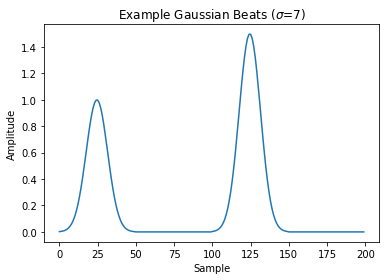

In [14]:
plt.plot(example_beats)
plt.title(r"Example Gaussian Beats ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample");

## Create unaccented pattern:

In [28]:
una_patt = np.zeros(sequence_length,)
for note in notes:
  n_on = onsets[note-1]
  print(note)
  una_patt[n_on:n_on+len(beat)] = beat
  


1
3
4
5


plot it:

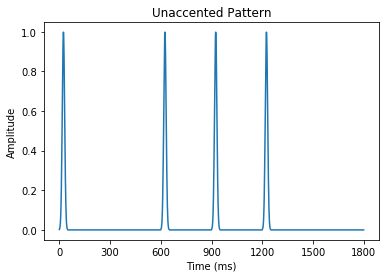

In [29]:
plt.plot(una_patt);
plt.title(r"Unaccented Pattern");
plt.ylabel("Amplitude");
plt.xlabel("Time (ms)");
plt.xticks(tick_m);

(28800,)


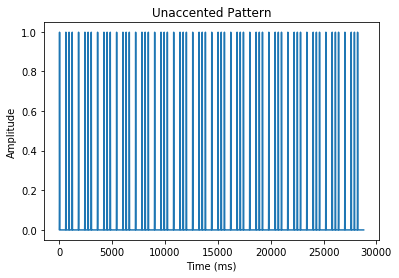

In [24]:
long_una_patt = np.concatenate([una_patt,una_patt,una_patt,una_patt,una_patt,
                                una_patt,una_patt,una_patt,una_patt,una_patt,
                                una_patt,una_patt,una_patt,una_patt,una_patt,
                                una_patt])
print(long_una_patt.shape)
plt.plot(long_una_patt);
plt.title(r"Unaccented Pattern");
plt.ylabel("Amplitude");
plt.xlabel("Time (ms)");


In [33]:
dup_patt = np.copy(una_patt)
for note in accents_d:
  n_on = onsets[note-1]
  print(note)
  dup_patt[n_on:n_on+len(abeat)] = abeat
  
long_dup_patt = np.concatenate([dup_patt,dup_patt,dup_patt,dup_patt,dup_patt,
                                dup_patt,dup_patt,dup_patt,dup_patt,dup_patt,
                                dup_patt,dup_patt,dup_patt,dup_patt,dup_patt,
                                dup_patt])

1
3
5


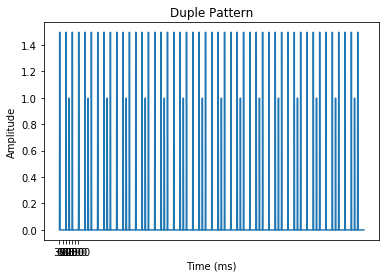

In [35]:
plt.plot(long_dup_patt);
plt.title(r"Duple Pattern");
plt.ylabel("Amplitude");
plt.xlabel("Time (ms)");
plt.xticks(tick_m);

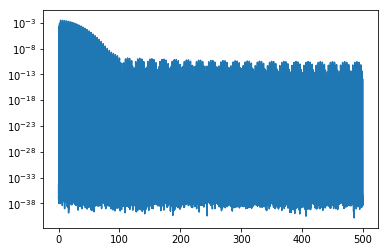

In [42]:
f, Pxx_den = signal.welch(long_una_patt, srate, nfft = 28800,nperseg=28800,noverlap=1000, scaling='spectrum')
fig, ax1 = plt.subplots()
ax1.semilogy(f, Pxx_den)
